In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import svm
from sklearn.model_selection import cross_val_score
from mpl_toolkits import mplot3d
import idx2numpy
import matplotlib



rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:

#filepaths
file_train_images = r'./mnist/train-images.idx3-ubyte'
file_train_labels = r'./mnist/train-labels.idx1-ubyte'
file_test_images = r'./mnist/t10k-images.idx3-ubyte'
file_test_labels = r'./mnist/t10k-labels.idx1-ubyte'

train_images = idx2numpy.convert_from_file(file_train_images)
train_labels = idx2numpy.convert_from_file(file_train_labels)
test_images = idx2numpy.convert_from_file(file_test_images)
test_labels = idx2numpy.convert_from_file(file_test_labels)

In [4]:
m = 28**2
n = len(train_labels)

A = np.zeros((m,n))

for i in range(n):
    image = train_images[i].reshape(-1)
    A[:, i] = image
    

In [5]:
U, S, VT = np.linalg.svd(A - np.mean(A, axis = 1)[:, np.newaxis], full_matrices = False)

In [6]:
m = 28**2
nt = len(test_labels)

At = np.zeros((m,nt))

for i in range(nt):
    image = test_images[i].reshape(-1)
    At[:, i] = image

Ut, St, VTt = np.linalg.svd(At - np.mean(At, axis = 1)[:, np.newaxis], full_matrices = False)

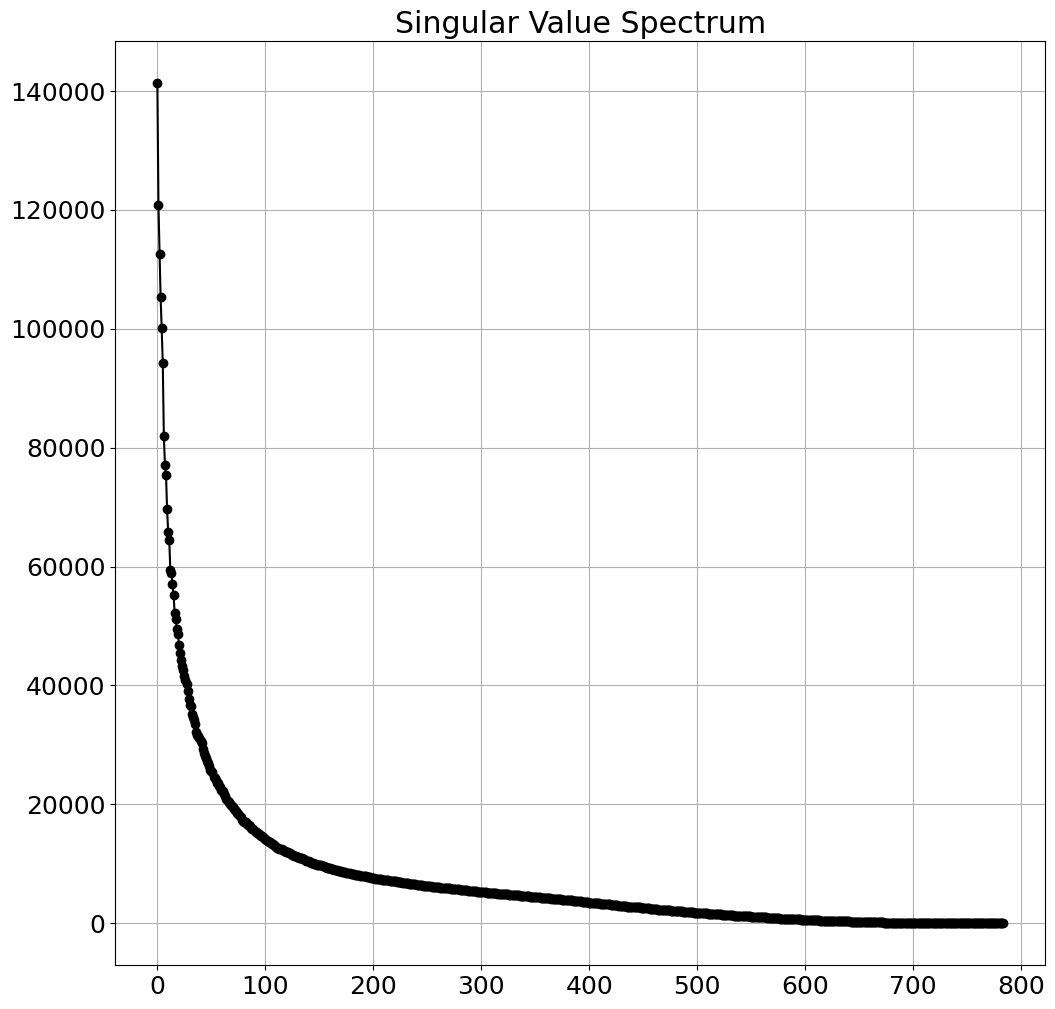

In [12]:
plt.plot(S,'-o',color='k')
plt.grid()
plt.title('Singular Value Spectrum')
plt.show()

In [13]:
mode1 = VT.T[0, :]
mode2 = VT.T[1, :]
mode3 = VT.T[2, :]

projections = np.zeros((3, n))
 
for i in range(n):
    image = A[:, i]
    projections[0, i] = np.dot(image, mode1)
    projections[1, i] = np.dot(image, mode2)
    projections[2, i] = np.dot(image, mode3)


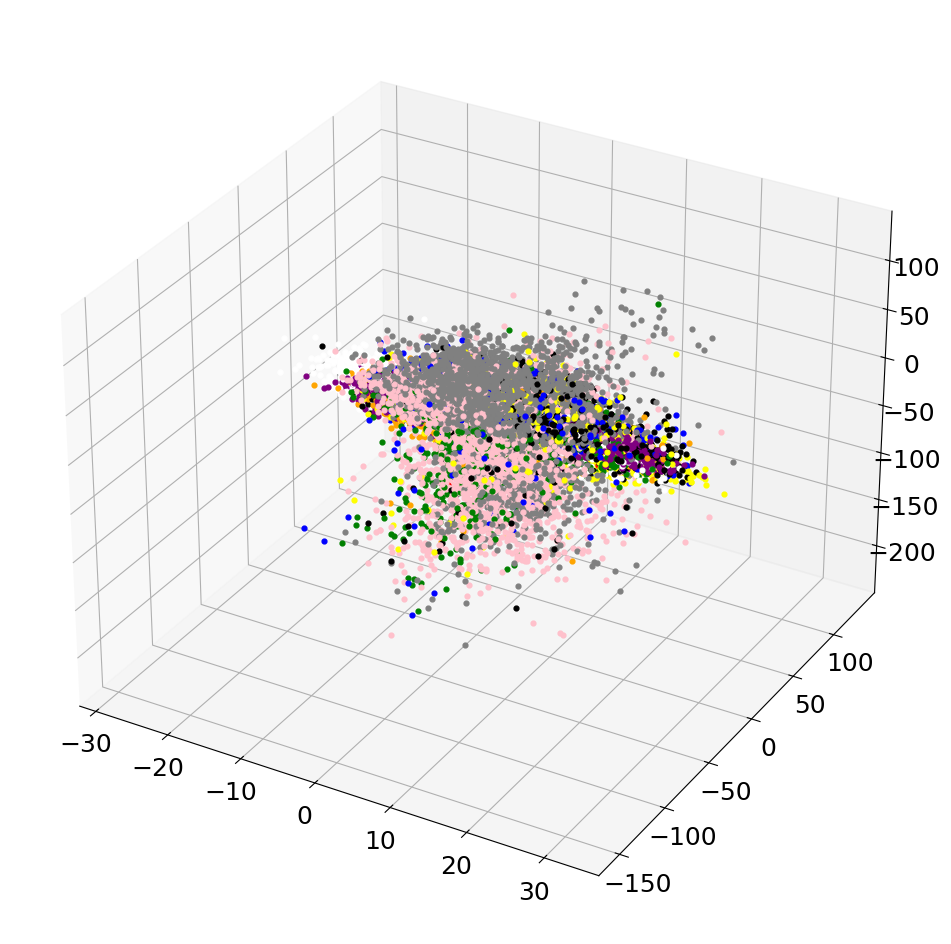

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

labelcolor = {
    0: 'white',
    1: 'red',
    2: 'orange',
    3: 'yellow',
    4: 'green',
    5: 'blue',
    6: 'purple',
    7: 'gray',
    8: 'black',  
    9: 'pink'
}
 
for i in range(projections.shape[1]): 
    x = projections[0, i]
    y = projections[1, i]
    z = projections[2, i]
    ax.scatter(x, y, z, c=labelcolor[train_labels[i]], s=12) 

plt.show()


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

V = VT.T

index = [[] for _ in range(10)]

for i, label in enumerate(train_labels):
    index[label].append(i)

ones = np.zeros((m, len(index[1])))
twos = np.zeros((m, len(index[2])))
threes = np.zeros((m, len(index[3])))
fours = np.zeros((m, len(index[4])))
fives = np.zeros((m, len(index[5])))
sixs = np.zeros((m, len(index[6])))
sevens = np.zeros((m, len(index[7])))
eights = np.zeros((m, len(index[8])))
nines = np.zeros((m, len(index[9])))
zeros = np.zeros((m, len(index[0])))

one_count = 0
two_count = 0
three_count = 0
four_count = 0
five_count = 0
six_count = 0
seven_count = 0
eight_count = 0
nine_count = 0
zero_count = 0

for i in range(len(train_labels)):
    if train_labels[i] == 1:
        ones[:,one_count] = A[:,i]
        one_count += 1
    elif train_labels[i] == 2:
        twos[:,two_count] = A[:,i]
        two_count += 1
    elif train_labels[i] == 3:
        threes[:,three_count] = A[:,i]
        three_count += 1
    elif train_labels[i] == 4:
        fours[:,four_count] = A[:,i]
        four_count += 1
    elif train_labels[i] == 5:
        fives[:,five_count] = A[:,i]
        five_count += 1
    elif train_labels[i] == 6:
        sixs[:,six_count] = A[:,i]
        six_count += 1
    elif train_labels[i] == 7:
        sevens[:,seven_count] = A[:,i]
        seven_count += 1
    elif train_labels[i] == 8:
        eights[:,eight_count] = A[:,i]
        eight_count += 1
    elif train_labels[i] == 9:
        nines[:,nine_count] = A[:,i]
        nine_count += 1
    elif train_labels[i] == 0 :
        zeros[:,zero_count] = A[:,i]
        zero_count += 1


In [54]:
Vt = VTt.T

indext = [[] for _ in range(10)]

for i, label in enumerate(test_labels):
    indext[label].append(i)

onest = np.zeros((m, len(indext[1])))
twost = np.zeros((m, len(indext[2])))
threest = np.zeros((m, len(indext[3])))
fourst = np.zeros((m, len(indext[4])))
fivest = np.zeros((m, len(indext[5])))
sixst = np.zeros((m, len(indext[6])))
sevenst = np.zeros((m, len(indext[7])))
eightst = np.zeros((m, len(indext[8])))
ninest = np.zeros((m, len(indext[9])))
zerost = np.zeros((m, len(indext[0])))

onet_count = 0
twot_count = 0
threet_count = 0
fourt_count = 0
fivet_count = 0
sixt_count = 0
sevent_count = 0
eightt_count = 0
ninet_count = 0
zerot_count = 0
labelst = []
for i in range(len(test_labels)):
    if test_labels[i] == 1:
        onest[:,onet_count] = At[:,i]
        onet_count += 1
        labelst.append(1)
    elif test_labels[i] == 2:
        twost[:,twot_count] = At[:,i]
        twot_count += 1
        labelst.append(-1)
    elif test_labels[i] == 3:
        threest[:,threet_count] = At[:,i]
        threet_count += 1
        labelst.append(-1)
    elif test_labels[i] == 4:
        fourst[:,fourt_count] = At[:,i]
        fourt_count += 1
        labelst.append(-1)
    elif test_labels[i] == 5:
        fivest[:,fivet_count] = At[:,i]
        fivet_count += 1
        labelst.append(-1)
    elif test_labels[i] == 6:
        sixst[:,sixt_count] = At[:,i]
        sixt_count += 1
        labelst.append(-1)
    elif test_labels[i] == 7:
        sevenst[:,sevent_count] = At[:,i]
        sevent_count += 1
        labelst.append(-1)
    elif test_labels[i] == 8:
        eightst[:,eightt_count] = At[:,i]
        eightt_count += 1
        labelst.append(-1)
    elif test_labels[i] == 9:
        ninest[:,ninet_count] = At[:,i]
        ninet_count += 1
        labelst.append(-1)
    elif test_labels[i] == 0:
        zerost[:,zerot_count] = At[:,i]
        zerot_count += 1
        labelst.append(-1)

In [55]:
train = np.concatenate((ones.T, eights.T), axis=0)
label = np.concatenate((np.ones(ones.shape[1]), -1 * np.ones(eights.shape[1])))
test = np.concatenate((onest.T, eightst.T), axis=0)

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(train, label).predict(test)

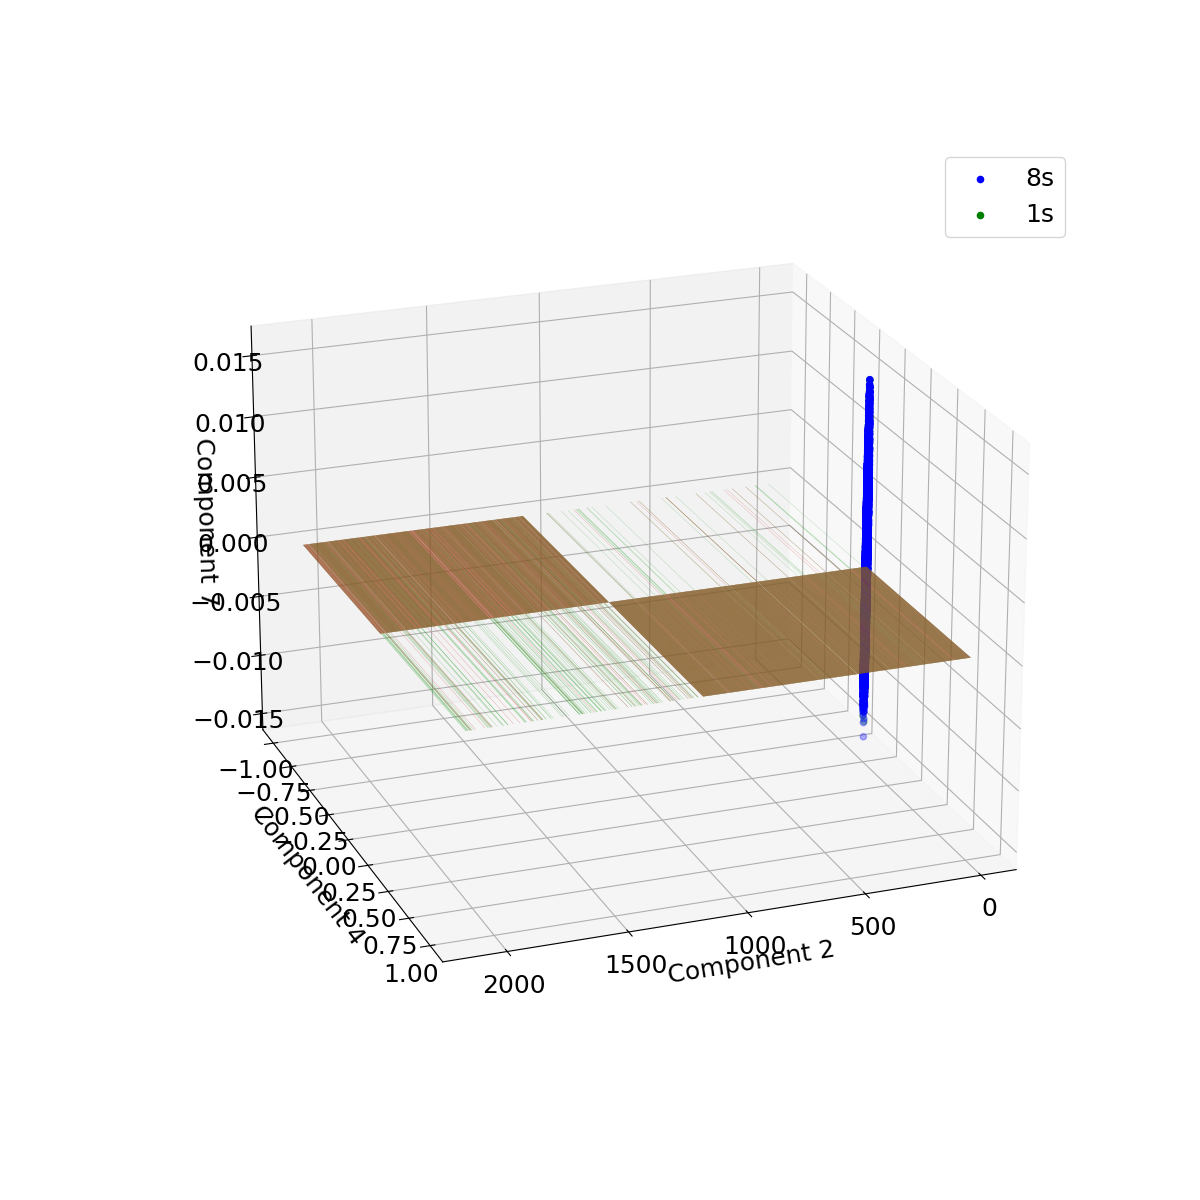

In [56]:
plt.bar(range(len(test_class)),test_class)

plt.show()

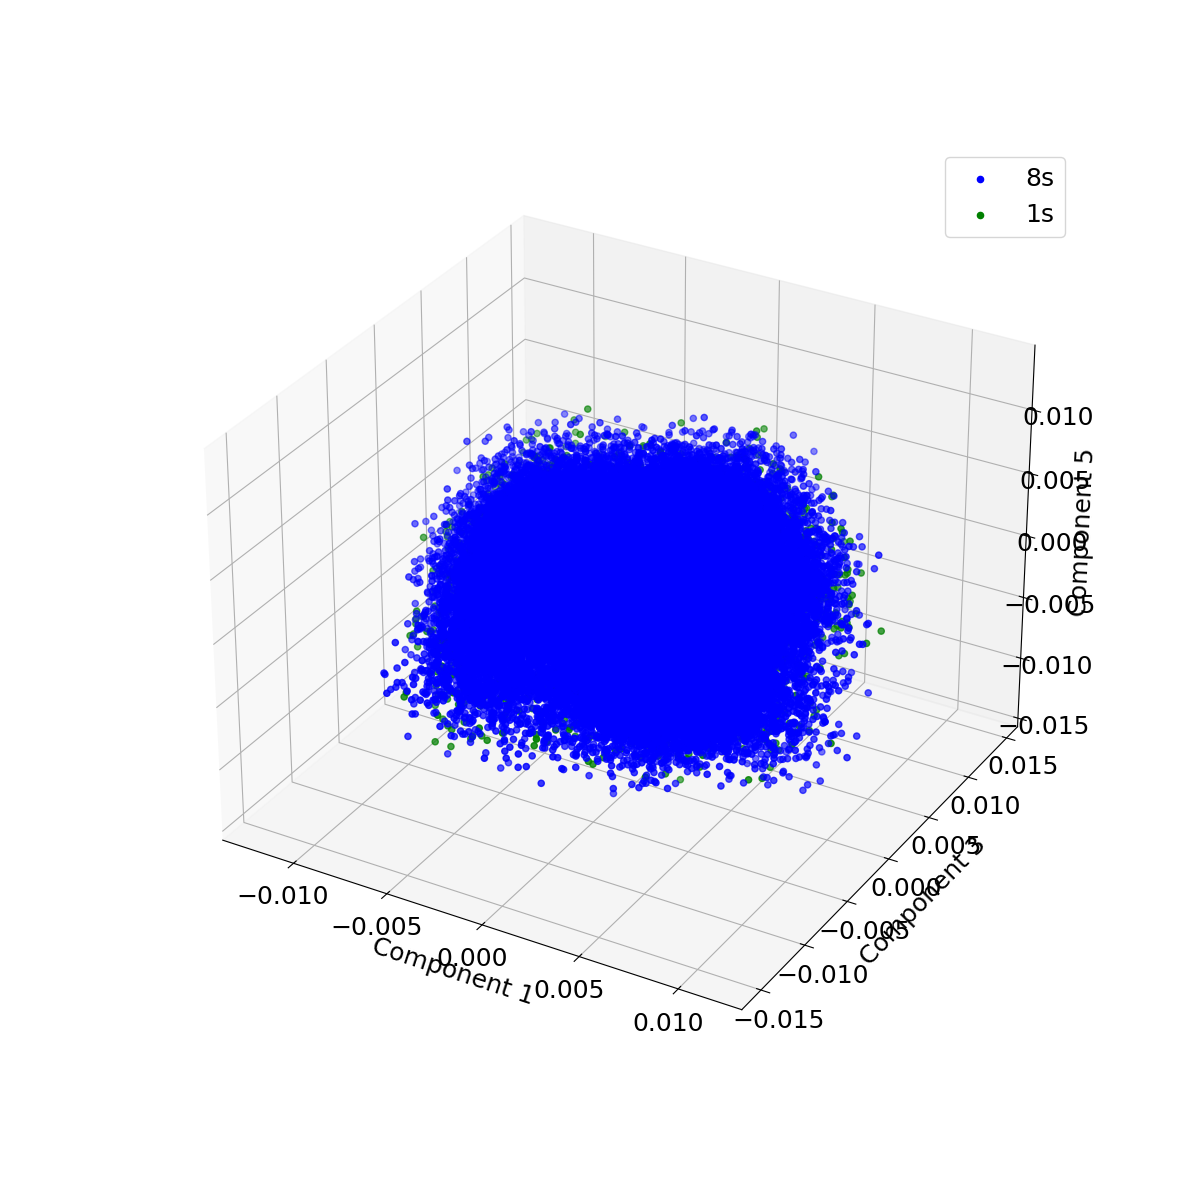

In [57]:

# Create a new figure and add a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

comp1 = 1
comp2 = 3
comp3 = 5
# Assuming 'V' is the matrix you want to plot and 'one_count' is the number of 'ones'
ax.scatter(V[one_count:, comp1], V[one_count:, comp2], V[one_count:, comp3], c='b', marker='o',label='8s')  # 'c' is the color
ax.scatter(V[:one_count, comp1], V[:one_count, comp2], V[:one_count, comp3], c='g', marker='o',label='1s')  # 'c' is the color
ax.set_xlabel(f'Component {comp1}')
ax.set_ylabel(f'Component {comp2}')
ax.set_zlabel(f'Component {comp3}')

plt.legend()
#plt.show()


In [1]:
%matplotlib widget


In [ ]:
train = np.concatenate((twos.T, nines.T), axis=0)
label = np.concatenate((np.ones(twos.shape[1]), -1 * np.ones(eights.shape[1])))
test = np.concatenate((onest.T, eightst.T), axis=0)

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(train, label).predict(test)